 <h1><center>Exploring Python for Analytics</center></h1>

This Notebook is my personal exploration of the basic Python functionalities needed for Data Analytics.

The objective of this notebook is to understand the nuances of Python and building a strong understanding of the basics. After all, any building is only as strong as its foundation.

**What this notebook will contain:**
- Working with Numpy, Pandas, Matplotlib, Scikit and other packages

**What this notebook will NOT contain:**
- Fully fleshed out ML models


## Python Functions

- Created using `def` keyword
- Indentation is the unoffical way to define the content within the function
- Pass default values for arguments using `def fn_name(arg_1, arg_2=False):`

### Example - with a Simulation

A new virus has broken out in a city. The below program simulates the number of cases checking into the hospital at the end of the incubation period when the individual becomes really sick.

In [3]:
import numpy as np
from numpy import random
import pandas as pd
import matplotlib.pyplot as plt

def simulateNewCases(m,a=2,d=5,n=4,p=.2):
    '''Function to simulate the number of cases checking into a hospital each day
    m: the number of days to simulate.
    a: the first day after infection when a patient becomes contagious.
    d: the last day after infection when a patient may infect others (not in isolation). 
    n: the number of uninfected individuals a person contacts each day.
    p: the probability of infecting a close contact each day. '''
    day= 0   
    cont=0
    new_i = [1]
    hosp=[0 for i in range(0,m+1)]

    for day in range(1,m+1):
        if day < a:
            # cont is still 0 since no one is contagious yet
            # leave hospitalizd also the same
            # new infections also 0 since no one is contagious but we still need to append a 0
            new_i.append(0)

        elif day < d:
            cont= sum(new_i[:day-a+1])
            new_i.append(random.binomial(cont*n,p))
            # Since days are less than d, no one is hospitalized
        else:
            # Case where people come out of incubation and get hospitalized
            cont=sum(new_i[(day-d):(day-a+1)])
            new_i.append(random.binomial(cont*n,p))
            hosp[day]=new_i[day-d]
    
    return hosp[1:]

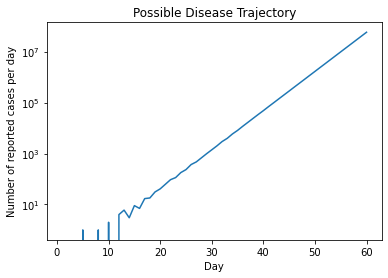

In [4]:
# Test Code to plot one possible disease trajectory. Re-run to see a different trajectory.
import pandas as pd
import matplotlib.pyplot as plt
m=60
s=pd.Series(simulateNewCases(m),index=range(1,m+1))
s.plot(logy=True,title='Possible Disease Trajectory')
plt.xlabel('Day')
plt.ylabel('Number of reported cases per day')
plt.show()

# Numpy

## Creating ndarrays

**Quick read:**
- The dimensions in an array are also sometimes referred to as 'ranks'.
Eg. A 1 dimensional array can also be called a rank 1 array.
- The number of elements in an array is equal to the product of the dimensions of the array

In [1]:
import numpy as np

### Turning an list into an array

Easiest way to create an array is to convert a list


In [7]:
data1 = [6, 7.5, 8, 0, 1]
arr1 = np.array(data1)
arr1

array([6. , 7.5, 8. , 0. , 1. ])

In [8]:
type(arr1)

numpy.ndarray

### Nested lists to n-dimensional array

These can be accessed by indexed from the outermost level

In [9]:
data2 = [[1, 2, 3, 4], [5, 6, 7, 8]]
arr2 = np.array(data2)
arr2

array([[1, 2, 3, 4],
       [5, 6, 7, 8]])

Access the elements from the outside-in

In [10]:
arr2[1]

array([5, 6, 7, 8])

In [12]:
arr2[0][1]

2

### Methods and attributes

#### To see the number of dimensions or the shape of the ndarray

In [13]:
arr2.shape

(2, 4)

In [14]:
arr2.ndim # since it's a 2-D array

2

#### Datatype

In [15]:
arr1.dtype

dtype('float64')

In [17]:
arr2.dtype

dtype('int64')

#### Empty arrays / zero / ones arrays

In [19]:
zarr=np.zeros(8)
zarr

array([0., 0., 0., 0., 0., 0., 0., 0.])

In [23]:
zarr=np.zeros((3,4,3))
zarr

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]])

`numpy.ones_like(a, dtype=None, order='K', subok=True, shape=None)`

Returns an array of ones with the same shape and type as a given array.

In [31]:
np.ones_like(zarr)

array([[[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]])

**REMEMBER: The np.empty doesn't create 0 values!**

In [4]:
earr = np.empty((3,1,2))
earr

array([[[1.28822975e-231, 1.28822975e-231]],

       [[1.48219694e-323, 0.00000000e+000]],

       [[0.00000000e+000, 4.17201348e-309]]])

#### arange function

By default returns an integer data type array

In [30]:
np.arange(9)

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

#### np.full

In [33]:
np.full((2, 2), 10)


array([[10, 10],
       [10, 10]])

In [36]:
np.full((2, 2,3), [1, 2,3]) #the dimensions need to match

array([[[1, 2, 3],
        [1, 2, 3]],

       [[1, 2, 3],
        [1, 2, 3]]])

In [41]:
np.full_like(earr,[1,2],int) # By adding the dtype=int , we get rid of the decimal point

array([[[1, 2]],

       [[1, 2]],

       [[1, 2]]])

#### Identity matrices

In [43]:
np.eye(5, dtype=int)

array([[1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1]])

**You can adjust the column where the diagonal is meant to start**

This is done using the argument `k=`

In [46]:
np.eye(5, dtype=int, k=2)

array([[0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0]])

In [50]:
np.identity(3,int)

array([[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1]])

**Is there an advantage for one over the other?**

### Numpy data types

Check it out here: https://numpy.org/devdocs/user/basics.types.html

You can explicitly cast arrays to a different datatype

In [51]:
arr = np.array([1, 2, 3, 4, 5])
arr.dtype

dtype('int64')

In [53]:
float_arr = arr.astype(np.float64)
print(float_arr,'\n',float_arr.dtype)

[1. 2. 3. 4. 5.] 
 float64


And voila! Your integer array is now float!

Next, casting some floating-point numbers to be of
integer dtype, **the decimal part will be truncated:**

In [55]:
arr = np.array([3.7, -1.2, -2.6, 0.5, 12.9, 10.1])
arr.astype(np.int64)

array([ 3, -1, -2,  0, 12, 10])

If you have an array of strings representing numbers, you can use `astype` to convert them to numeric form:

In [56]:
numeric_strings = np.array(['1.25', '-9.6', '42'], dtype=np.string_)
numeric_strings.astype(float)

array([ 1.25, -9.6 , 42.  ])

If casting were to fail for some reason (like a string that cannot be converted to float64), a ValueError will be raised. Here I was a bit lazy and wrote float instead of `np.float64`; NumPy aliases the Python types to its own equivalent data dtypes.

You can also use another array’s `dtype` attribute:

In [57]:
int_array = np.arange(10)
calibers = np.array([.22, .270, .357, .380, .44, .50], dtype=np.float64)
int_array.astype(calibers.dtype)

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

## Arithmetic Operations

Arrays are important because they enable you to express batch operations on data without writing any for loops. NumPy users call this vectorization. 
Any arithmetic operation between equal-size arrays applies the operation element-wise

In [69]:
arr = np.array([[1., 2., 3.], [4., 5., 6.]])
print('The original array:\n', arr)
print('\narr + arr\n',arr+arr)
print('\n 1/arr \n',1/arr)
print('\narr * 2\n',arr*2)
print('\narr * arr\n',arr*2,
      '\n Note that this is simple vectorized multiplication \
and not Matrix multiplication')
print('\narr ** 2\n',arr**2,'\n Squares each element of the array')

The original array:
 [[1. 2. 3.]
 [4. 5. 6.]]

arr + arr
 [[ 2.  4.  6.]
 [ 8. 10. 12.]]

 1/arr 
 [[1.         0.5        0.33333333]
 [0.25       0.2        0.16666667]]

arr * 2
 [[ 2.  4.  6.]
 [ 8. 10. 12.]]

arr * arr
 [[ 2.  4.  6.]
 [ 8. 10. 12.]] 
 Note that this is simple vectorized multiplication and not Matrix multiplication

arr ** 2
 [[ 1.  4.  9.]
 [16. 25. 36.]] 
 Squares each element of the array


### Dot product

We use the ‘dot’ function to compute inner products of vectors, to multiply a vector by a matrix, and to multiply matrices. 
`dot` is available both as a function in the numpy module and as an instance method of array objects:

#### Inner multiplication of two vectors

This is **NOT** matrix multiplication since we're multiplying a 1x2 vector into a 1x2 vector only. This is strictly 1D

In [70]:
v = np.array([9,10])
w = np.array([11, 12])
print('v = \n',v,'\n')
print('w = \n',w,'\n')

v = 
 [ 9 10] 

w = 
 [11 12] 



In [71]:
np.dot(v, w) # or you can write 'v.dot(w)':9*11 + 10*12 = 219

219

#### Matrix Multiplication

In [72]:
x = np.array([[1,2],[3,4]])
y = np.array([[5,6],[7,8]])
print('x = \n',x,'\n')
print('y = \n',y,'\n')

x = 
 [[1 2]
 [3 4]] 

y = 
 [[5 6]
 [7 8]] 



In [73]:
np.dot(x, y) 

array([[19, 22],
       [43, 50]])

#### Comparisons between arrays of the same size yield boolean arrays:

In [74]:
arr2 = np.array([[0., 4., 1.], [7., 2., 12.]])
arr2

array([[ 0.,  4.,  1.],
       [ 7.,  2., 12.]])

In [79]:
print(f'arr:\n{arr}\n\narr2:\n{arr2}\n\narr2 > arr:{arr2 > arr}')

arr:
[[1. 2. 3.]
 [4. 5. 6.]]

arr2:
[[ 0.  4.  1.]
 [ 7.  2. 12.]]

arr2 > arr:[[False  True False]
 [ True False  True]]


## Indexing and Slicing

In [90]:
arr = np.arange(10)
print('arr:\n',arr)
print('\narr[5]:\n',arr[5])
print('\narr[5:8]:\n',arr[5:8])



arr:
 [0 1 2 3 4 5 6 7 8 9]

arr[5]:
 5

arr[5:8]:
 [5 6 7]


In [91]:
arr[5:8] = 12
arr

array([ 0,  1,  2,  3,  4, 12, 12, 12,  8,  9])

An important first distinction from Python’s built-in lists is that **array slices are views on the original array.** This means that the data is not
copied, and **any modifications to the view will be reflected in the source array.**

In [92]:
arr_slice = arr[5:8]
arr_slice

array([12, 12, 12])

Now, when I change values in `arr_slice`, the mutations are reflected in the original array `arr`:

In [93]:
arr_slice[1] = 12345
arr

array([    0,     1,     2,     3,     4,    12, 12345,    12,     8,
           9])

### Bare slice

The “bare” slice [:] will assign to all values in an array:

In [94]:
arr_slice[:] = 64
arr

array([ 0,  1,  2,  3,  4, 64, 64, 64,  8,  9])

### Copying a section of the array
You have to copy a slice explicitly! Remember - slicing is not copying

Use `array_name.copy()`

### Indexing higher dimensional arrays


####  2D array
In a two-dimensional array, the elements at each index are no longer scalars but rather one-dimensional arrays.

**NOTE:**
Here you don't use tuples like while creating the arrays to access the elements.

In [97]:
arr2d = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print(f'arr2d:\n{arr2d}\n')
print(f'arr2d[2]:\n{arr2d[2]}\n')
print(f'arr2d[0][2]:\n{arr2d[0][2]}\n')
print(f'arr2d[0, 2]:\n{arr2d[0, 2]}\n')


arr2d:
[[1 2 3]
 [4 5 6]
 [7 8 9]]

arr2d[2]:
[7 8 9]

arr2d[0][2]:
3

arr2d[0, 2]:
3



#### 3D and more
In multidimensional arrays, if you omit later indices, the returned object will be a lower-dimensional ndarray consisting of all the data along the higher dimensions.

**AGAIN** remember that these slices/indices are still only **views** of the original array and any changes made to the slices would also reflect on the original array.

So in the 2 × 2 × 3 array arr3d:

In [100]:
arr3d = np.array([[[1, 2, 3], [4, 5, 6]], [[7, 8, 9], [10, 11, 12]]])
print(f'arr3d:\n{arr3d}\n')
print(f'arr3d[0]:\n{arr3d[0]}\n')
print(f'arr3d[1, 0]:\n{arr3d[1, 0]}\n')
print(f'arr3d[0, 1,2]:\n{arr3d[0,1, 2]}\n')

arr3d:
[[[ 1  2  3]
  [ 4  5  6]]

 [[ 7  8  9]
  [10 11 12]]]

arr3d[0]:
[[1 2 3]
 [4 5 6]]

arr3d[1, 0]:
[7 8 9]

arr3d[0, 1,2]:
6



Using with the slice operator `:`

In [103]:
print('arr:\n',arr)
print('arr[:3]\n',arr[:3])

arr:
 [ 0  1  2  3  4 64 64 64  8  9]
arr[:3]
 [0 1 2]


In [111]:
print('arr2d\n',arr2d)
print('\narr2d[:2]\n',arr2d[:2])
print('\narr2d[:2,:2]\n',arr2d[:2,:2])
print('\narr2d[1:,1:]\n',arr2d[1:,1:])
print('\narr2d[1:,2]\n',arr2d[1:,2])
print('\narr2d[2:,:]\n',arr2d[2:,:])


arr2d
 [[1 2 3]
 [4 5 6]
 [7 8 9]]

arr2d[:2]
 [[1 2 3]
 [4 5 6]]

arr2d[:2,:2]
 [[1 2]
 [4 5]]

arr2d[1:,1:]
 [[5 6]
 [8 9]]

arr2d[1:,2]
 [6 9]

arr2d[2:,:]
 [[7 8 9]]


### Boolean Indexing
Boolean array indexing lets you pick out arbitrary elements of an array. Frequently this type of indexing is used to select the elements of an array that satisfy some condition.

In [118]:
a = np.array([[1,2], [3, 4], [5, 6]])
print('a is: \n', a)
print(f'\nTo find the elements of a that are greater than two:\n\
a>2 gives:\n{a>2}')
print(f'\n Then a[a>2] gives us the elements directly:\n{a[a>2]}')

a is: 
 [[1 2]
 [3 4]
 [5 6]]

To find the elements of a that are greater than two:
a>2 gives:
[[False False]
 [ True  True]
 [ True  True]]

 Then a[a>2] gives us the elements directly:
[3 4 5 6]


In [126]:
b = np.array([[[1,2], [3, 4]], [[5, 6],[7,8]]])
print('b is: \n', b)
print(f'\nThe shape of b is{b.shape}')
print(f'\nTo find the elements of b that are greater than two:\n\
b>2 gives:\n{b>2}')
print(f'\n Then b[b>2] gives us the elements directly:\n{b[b>2]}')

b is: 
 [[[1 2]
  [3 4]]

 [[5 6]
  [7 8]]]

The shape of b is(2, 2, 2)

To find the elements of b that are greater than two:
b>2 gives:
[[[False False]
  [ True  True]]

 [[ True  True]
  [ True  True]]]

 Then b[b>2] gives us the elements directly:
[3 4 5 6 7 8]


If we save the result of this Boolean indexing into another variable:

In [125]:
bool_arr=b[b>2]
print(f'bool_arr contains:\n{bool_arr}\nIts shape is {bool_arr.shape} and has \
{bool_arr.ndim} dimension(s).')

bool_arr contains:
[3 4 5 6 7 8]
Its shape is (6,) and has 1 dimension(s).


**You can also use multiple conditions:**

The boolean array must be of the same length as the array axis it’s indexing.

In [128]:
b[(b==1)|(b>5)]

array([1, 6, 7, 8])

### Fancy Indexing

This is simply indexing using integer arrays.

**NOTE**
Fancy Indexing **DOES** actually create a copy and not a view.
Changes to the new array do not reflect on the original

In [130]:
arr = np.empty((8, 4))
for i in range(8):
    arr[i] = i
arr

array([[0., 0., 0., 0.],
       [1., 1., 1., 1.],
       [2., 2., 2., 2.],
       [3., 3., 3., 3.],
       [4., 4., 4., 4.],
       [5., 5., 5., 5.],
       [6., 6., 6., 6.],
       [7., 7., 7., 7.]])

In [131]:
arr[[6,3,2]]

array([[6., 6., 6., 6.],
       [3., 3., 3., 3.],
       [2., 2., 2., 2.]])

In [137]:
arr[2,2]=9
arr[6,1]=84
arr

array([[ 0.,  0.,  0.,  0.],
       [ 1.,  1.,  1.,  1.],
       [ 2.,  2.,  9.,  2.],
       [ 3.,  3.,  3.,  3.],
       [ 4.,  4.,  4.,  4.],
       [ 5.,  5.,  5.,  5.],
       [ 6., 84.,  6.,  6.],
       [ 7.,  7.,  7.,  7.]])

In [138]:
arr[[6,2],[1,2]]

array([84.,  9.])

It's possible to select numbers out of the array like above.
84 is at index [6,1] and 9 is at index [2,2]


**Negative indexing**

In [141]:
arr[[-1, -2, -6]]


array([[ 7.,  7.,  7.,  7.],
       [ 6., 84.,  6.,  6.],
       [ 2.,  2.,  9.,  2.]])

In [142]:
arr[[-1, -2, -6],[-1,-3,-2]]

array([ 7., 84.,  9.])

## Transposing

In [143]:
arr = np.arange(15).reshape((3, 5))
arr

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [144]:
arr.T

array([[ 0,  5, 10],
       [ 1,  6, 11],
       [ 2,  7, 12],
       [ 3,  8, 13],
       [ 4,  9, 14]])

In [145]:
arr

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

The `.T` again only creates a view and does not save the changes.

Now comes the tricky part - **TRANSPOSE**


In [146]:
arr = np.arange(16).reshape((2, 2, 4))
arr

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7]],

       [[ 8,  9, 10, 11],
        [12, 13, 14, 15]]])

Transpose swaps the axes. So in a 3D array, we're swapping the first two axes in the below example:

`arr[x][y][z]=arr[y][x][z]` in the below example

In [148]:
arr.transpose((1, 0, 2)) 

array([[[ 0,  1,  2,  3],
        [ 8,  9, 10, 11]],

       [[ 4,  5,  6,  7],
        [12, 13, 14, 15]]])

In [149]:
arr

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7]],

       [[ 8,  9, 10, 11],
        [12, 13, 14, 15]]])

In [150]:
arr.transpose((1, 2, 0)) 

array([[[ 0,  8],
        [ 1,  9],
        [ 2, 10],
        [ 3, 11]],

       [[ 4, 12],
        [ 5, 13],
        [ 6, 14],
        [ 7, 15]]])

Note that when you transpose the array, the shape changes.
The original 2x2x4 array stays 2x2x4 since you're swapping the first axis of 2 with the next axis of 2 again.

However, when we transpose the 2x2x4 array with `.transpose((1,2,0))` then the transposed array becomes 2x4x2.

In [152]:
arr

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7]],

       [[ 8,  9, 10, 11],
        [12, 13, 14, 15]]])

In [153]:
arr.swapaxes(1, 2) 

array([[[ 0,  4],
        [ 1,  5],
        [ 2,  6],
        [ 3,  7]],

       [[ 8, 12],
        [ 9, 13],
        [10, 14],
        [11, 15]]])

## Universal Functions - UFunc

Universal functions can perform vectorized operations in ndarrays.

In [155]:
arrv = np.arange(10)
arrv

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [156]:
np.sqrt(arrv)

array([0.        , 1.        , 1.41421356, 1.73205081, 2.        ,
       2.23606798, 2.44948974, 2.64575131, 2.82842712, 3.        ])

In [157]:
np.exp(arrv)

array([1.00000000e+00, 2.71828183e+00, 7.38905610e+00, 2.00855369e+01,
       5.45981500e+01, 1.48413159e+02, 4.03428793e+02, 1.09663316e+03,
       2.98095799e+03, 8.10308393e+03])

The above were examples of unary functions. Unary functions work on a single array.
Binary ufuncs take two arrays and return a single array as output.

In [158]:
x = np.random.randn(8)
y = np.random.randn(8)
x

array([ 1.52947485,  0.98023832, -0.5087009 , -1.35100429,  1.10225549,
        0.73999219, -0.13416115, -0.65142265])

In [159]:
y

array([-0.99373767,  0.3839299 , -0.39854507,  1.11685623,  1.23780535,
        1.10952405, -1.17951564, -0.35556004])

In [160]:
np.maximum(x, y)

array([ 1.52947485,  0.98023832, -0.39854507,  1.11685623,  1.23780535,
        1.10952405, -0.13416115, -0.35556004])

In [161]:
arr = np.random.randn(7) * 5
arr

array([ 8.66379405,  0.30966228,  1.49297176,  6.25688475,  5.10587593,
       -3.83595465, -1.1413613 ])

In [164]:
remainder, whole_part = np.modf(arr)
print('The whole_part:\n',whole_part.astype(int))
print('The remainder:\n',remainder)

The whole_part:
 [ 8  0  1  6  5 -3 -1]
The remainder:
 [ 0.66379405  0.30966228  0.49297176  0.25688475  0.10587593 -0.83595465
 -0.1413613 ]


## Mathematical and Statistical functions

These functions can give us information about the array as a whole, or about data along a particular axis.
You can use aggregations (often called reductions) like sum, mean, and std (standard deviation) either by calling the array instance method or using the top-level NumPy function.

In [165]:
arr = np.random.randn(5, 4)
arr

array([[-2.22746263,  1.20997427,  0.3735963 , -0.1863019 ],
       [-0.26753087, -0.49423121,  0.4156787 , -1.56212555],
       [-0.2164341 ,  0.95321085, -1.83866276, -0.86031   ],
       [-0.29581274,  0.92969893, -0.63296952, -0.96666957],
       [ 1.14613926,  0.2244206 ,  1.4833805 , -0.11740603]])

In [166]:
np.mean(arr)

-0.14649087434777672

In [167]:
np.sum(arr)

-2.9298174869555345

### Axis-wise operation
Axis=1 goes along the rows while Axis=0 goes along the columns

In [174]:
arr.mean(axis=1) 

array([1., 4., 7.])

### cumsum

In [175]:
arr = np.array([0, 1, 2, 3, 4, 5, 6, 7])
print('arr is:\n',arr)
arr.cumsum()

arr is:
 [0 1 2 3 4 5 6 7]


array([ 0,  1,  3,  6, 10, 15, 21, 28])

In [176]:
arr = np.array([[0, 1, 2], [3, 4, 5], [6, 7, 8]])
arr

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [177]:
arr.cumsum(axis=0)

array([[ 0,  1,  2],
       [ 3,  5,  7],
       [ 9, 12, 15]])

In [178]:
arr.cumprod(axis=1)

array([[  0,   0,   0],
       [  3,  12,  60],
       [  6,  42, 336]])

In [179]:
arr = np.random.randn(100)
(arr > 0).sum()

57

### .any( ) / .all( )
`any` tests whether one or more values in an array is True, while `all` checks if every value is True:

In [180]:
bools = np.array([False, False, True, False])
bools.any()

True

In [181]:
bools.all()

False

# Scipy

## Compressed Sparse Row format

This is usually used while storing matrices with more zeros than actual values, especially in large matrices. Works only with 2D arrays.

A sparse matrix or sparse array is a matrix in which most of the elements are zero. 
Matrices where most of the values are non-zero are called dense.

In [183]:
eye = np.eye(4)
eye

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

In [185]:
from scipy import sparse
sparse_matrix = sparse.csr_matrix(eye)
sparse_matrix

<4x4 sparse matrix of type '<class 'numpy.float64'>'
	with 4 stored elements in Compressed Sparse Row format>

In [186]:
print("\nSciPy sparse CSR matrix:\n{}".format(sparse_matrix))


SciPy sparse CSR matrix:
  (0, 0)	1.0
  (1, 1)	1.0
  (2, 2)	1.0
  (3, 3)	1.0


In [187]:
from scipy.sparse import csr_matrix
csr_matrix((3, 4), dtype=np.int8).toarray()

array([[0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0]], dtype=int8)

In [188]:
row = np.array([0, 0, 1, 2, 2, 2])
col = np.array([0, 2, 2, 0, 1, 2])
data = np.array([1, 2, 3, 4, 5, 6])
csr_matrix((data, (row, col)), shape=(3, 3)).toarray()

array([[1, 0, 2],
       [0, 0, 3],
       [4, 5, 6]])